**THE SPARK FOUNDATION**

**PERFORM EXPLORATORY 'DATA ANALYSIS' ON DATASET 'SIMPLESUPERSTORE'**

**TASK 3- EXPLORATORY DATA ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [ ]:
df=pd.read_csv("SampleSuperstore.csv")

In [ ]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
df.shape

(9994, 13)

In [ ]:
#count of each category under shipment mode
df["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [ ]:
df["Country"].nunique()

1

In [ ]:
## dropping columns which dont affect profits much.
df = df.drop(["Country","Postal Code"],axis=1)

In [ ]:
#checking for duplicate values
df.duplicated().sum()

50

In [ ]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


**VISUALIZATION THRIUGH GRAPHS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


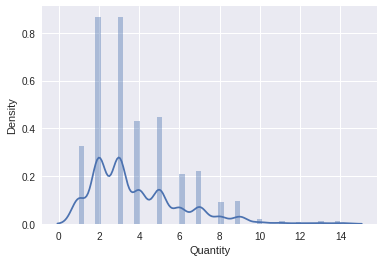

In [ ]:
sns.distplot(df["Quantity"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


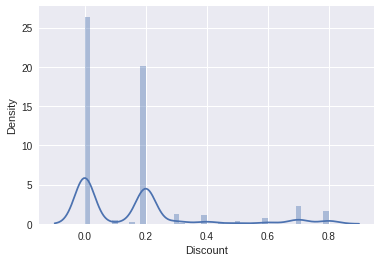

In [ ]:
sns.distplot(df["Discount"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


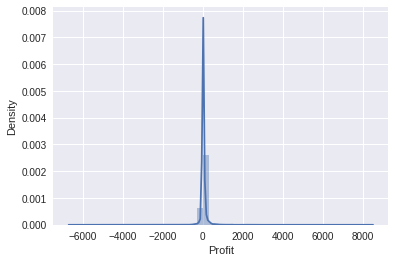

In [ ]:
sns.distplot(df["Profit"])
plt.show()

In [ ]:
corr = df.corr()
corr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


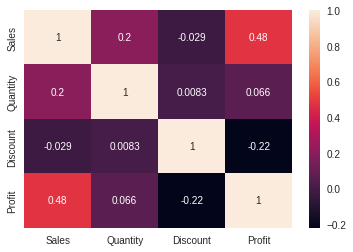

In [ ]:
sns.heatmap(corr, annot = True)

**STATE VS PROFIT**

In [ ]:
sales_df = df.groupby("State")["Profit"].sum()
sales_df = sales_df.reset_index()
sales_df.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76215.9705
4,Colorado,-6527.8579


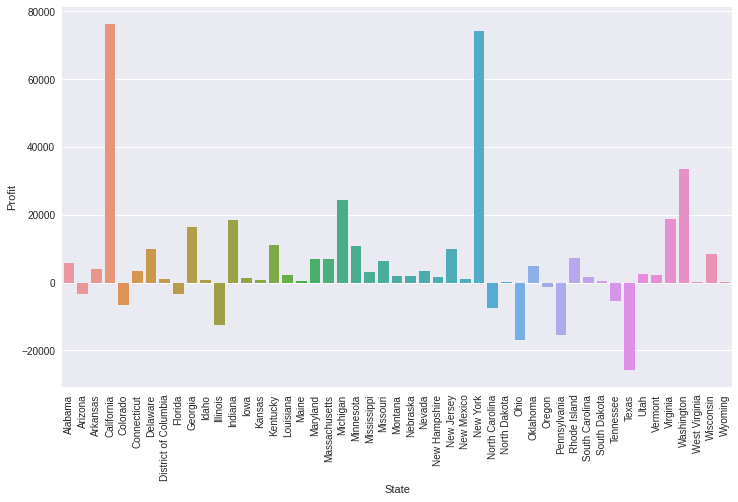

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x= sales_df["State"] , y = sales_df["Profit"])
plt.ylabel("Profit")
plt.xlabel("State")
plt.xticks(rotation = "vertical")
plt.show()

**CATEGORY VS PROFIT**

In [ ]:
category_df = df.groupby("Category")["Profit"].sum()
category_df = category_df.to_frame().reset_index()
category_df

,Category,Profit
0,Furniture,18484.9459
1,Office Supplies,122196.0726
2,Technology,145416.5394


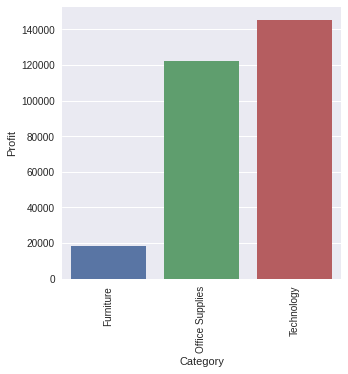

In [ ]:
plt.figure(figsize = (5,5))
sns.barplot(x = category_df["Category"], y = category_df["Profit"])
plt.ylabel("Profit")
plt.xlabel("Category")
plt.xticks(rotation="vertical")
plt.show()

**REGION VS PROFIT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


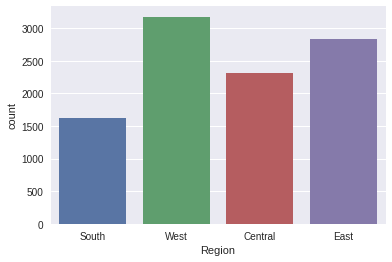

In [ ]:
sns.countplot("Region", data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


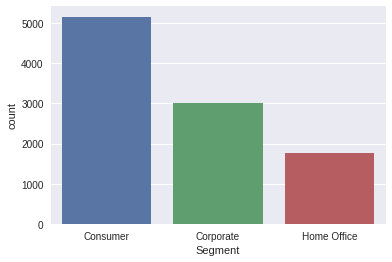

In [ ]:
sns.countplot("Segment", data=df)
plt.show()

**SUB-CATEGORY VS REGION**

[]

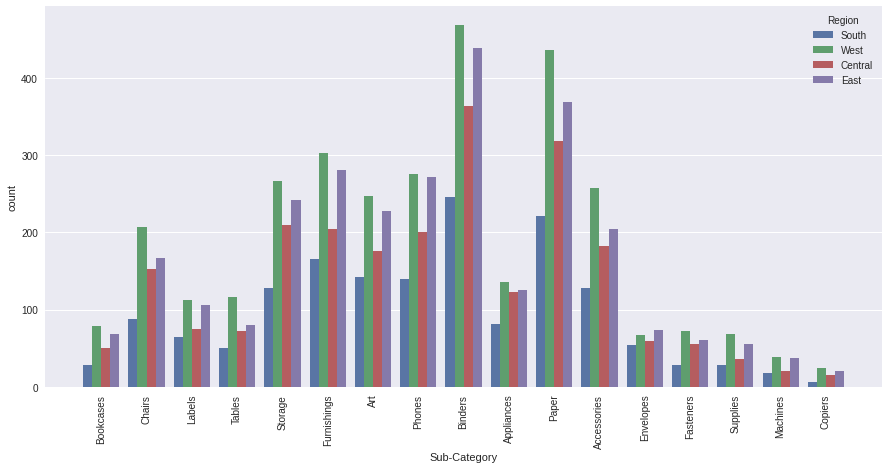

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="Sub-Category", hue= "Region", data=df)
plt.xticks(rotation="vertical")
plt.plot()

**SALES PER STATE**

In [ ]:
df_state = df.groupby("State")["Sales"].sum().sort_values(ascending = False)
df_state = df_state.to_frame().reset_index()
df_state.head()

,State,Sales
0,California,456629.9285
1,New York,310349.2150
2,Texas,170101.1278
3,Washington,138560.8100
4,Pennsylvania,116383.0100


Text(0, 0.5, 'Sales')

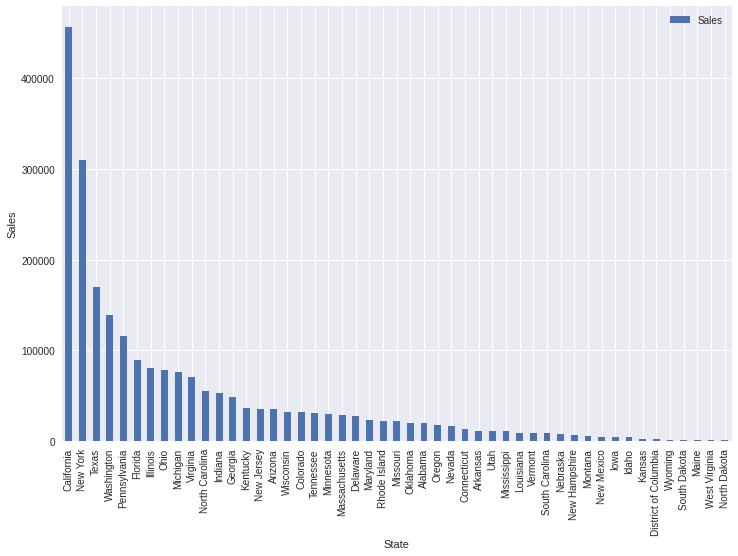

In [ ]:
df_state.plot(kind = "bar" , x = "State" ,  y = "Sales" , figsize = (12,8))
plt.ylabel("Sales")

PROFIT AND SALES FOR SUB-CATEGORIES

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


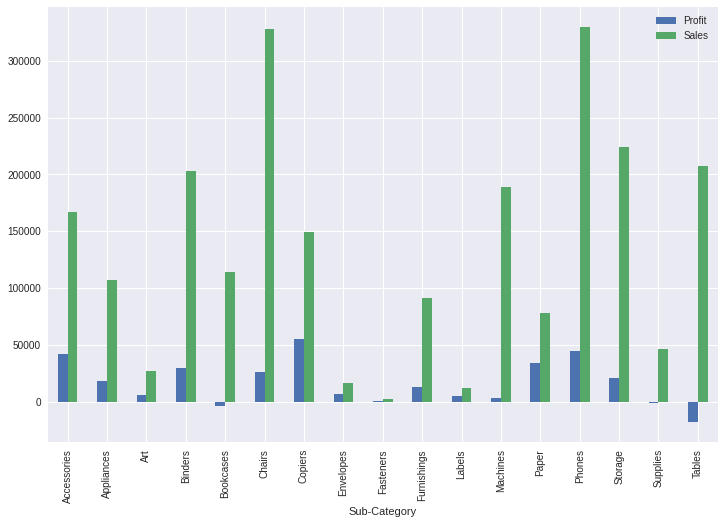

In [ ]:
sub_df = df.groupby("Sub-Category")["Profit" , "Sales"].sum()
sub_df.plot(kind = "bar"  ,figsize = (12 , 8))
plt.show()